# Water Network Analysis

In [1]:
import logging
import warnings
import pandas as pd
import json
from pyincore import InsecureIncoreClient
from pyincore.analyses.waternetworkdamage import WaterNetworkDamage
from pyincore.analyses.waternetworkrecovery import WaterNetworkRecovery, WaterNetworkRecoveryUtil
from pyincore import InventoryDataset
from matplotlib import animation, rc
from IPython.display import HTML

#### supress warning and info logging

In [2]:
warnings.filterwarnings('ignore')
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

## Preparation work
 - extract and save demand node
 - use QGIS to generate voronoi cell
 - use QGIS to do clipping
 - use QGIS to calculate the cell area (unit: acres)
 - use that voronoi cell shapefile and building inventory, find the mapping relationship of those two

In [3]:
def animate(i, resultsNday, wnNday):
    return wn_recovery.output_water_network(resultsNday, wnNday, timestamp=3600*i)

In [4]:
pd.read_csv('waternode_building_relations.csv')

,waternode_id,area,type,buildings
0,136,32.867324,RR,"['41007022013001001S', '41007022060001001S', '..."
1,119,13.202842,R1-PD,"['41007022972001001S', '41007022982001001S', '..."
2,105,13.246137,R2-PD,[]
3,104,10.242472,RR,"['41007023887001001S', '41007023889001001S', '..."
4,103,125.853273,R1,['41007024968001001S']
5,102,32.031242,C2,"['41007023298001001S', '41007023302001001S', '..."
6,101,75.549726,A3,"['41007021077001001S', '41007021082001001S', '..."
7,91,2.551492,RR,"['41007022319001001S', '41007022351001001S']"
8,88,75.718325,R2,"['41007025002001001S', '41007025005001001S', '..."
9,77,113.508085,OPR,"['41007025881001001S', '41007025913001001S', '..."


## Time 0 : before hazard happens
### run stochastic allocation model 

### calculate inital water demand based on stochastic allocation model  $unit = m^3/s$

In [5]:
waternode_population = \
WaterNetworkRecoveryUtil.calc_waternode_population('waternode_building_relations.csv', 
                                                   'population_allocation/sort_inventory_1238.csv')
waternode_population

{'136': 138,
 '119': 47,
 '105': 0,
 '104': 107,
 '103': 6,
 '102': 30,
 '101': 327,
 '91': 3,
 '88': 541,
 '77': 8,
 '72': 269,
 '66': 52,
 '28': 9,
 '21': 663,
 '20': 179,
 '19': 878,
 '152': 2,
 '153': 89,
 '154': 341,
 '193': 16,
 '198': 27,
 '199': 39,
 '203': 10,
 '155': 120,
 '204': 31,
 '207': 156,
 '208': 428,
 '219': 0,
 '220': 28,
 '221': 287,
 '226': 215,
 '227': 64,
 '254': 360,
 '255': 0,
 '268': 113,
 '272': 75,
 '353': 290,
 '354': 0,
 '355': 41,
 '366': 31,
 '369': 26,
 '380': 0,
 '393': 0,
 '396': 28,
 '399': 30,
 '414': 357,
 '423': 0}

In [37]:
demand0 = WaterNetworkRecoveryUtil.calc_waternode_demand('waternode_building_relations.csv', 
                                                               waternode_population)
demand0

{'136': 0.0006711214068,
 '119': 0.00022857033420000002,
 '105': 0.0,
 '104': 0.0005203622502000001,
 '103': 2.9179191600000002e-05,
 '102': 0.002862878831147619,
 '101': 0.0,
 '91': 1.4589595800000001e-05,
 '88': 0.0026309904426,
 '77': 0.0,
 '72': 0.0013082004234,
 '66': 0.0002528863272,
 '28': 4.3768787400000004e-05,
 '21': 0.0032243006718,
 '20': 0.0008705125494,
 '19': 0.0042698883708,
 '152': 0.00014369752482906265,
 '153': 0.0002176497027127195,
 '154': 0.0016583507226,
 '193': 0.0010583368874218855,
 '198': 0.0001313063622,
 '199': 0.0001896647454,
 '203': 0.0004506099645030565,
 '155': 0.000583583832,
 '204': 0.0002820272158114529,
 '207': 0.0010238753513035674,
 '208': 0.0020814490008000002,
 '219': 0.0,
 '220': 0.0001361695608,
 '221': 0.0013957379982,
 '226': 0.001045587699,
 '227': 0.0003112447104,
 '254': 0.001750751496,
 '255': 0.0,
 '268': 0.0005495414418,
 '272': 0.0005071158113266964,
 '353': 0.001410327594,
 '354': 0.0,
 '355': 0.0001993911426,
 '366': 0.000150759156

### construct the water network with initial demand ratio

In [40]:
WN_input_file = 'SEASIDE/skeletonized_WN/Seaside_Skeletonized_WN.inp'
wn_recovery = WaterNetworkRecovery(WN_input_file, demand0)

save water network as wn.pickle file


### plot the initial water network (OPTIONAL)

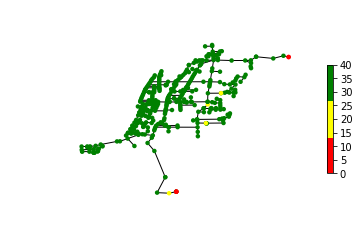

In [41]:
import pickle
import wntr
with open('wn.pickle', 'rb') as f:
    wn = pickle.load(f)
    
wn.options.time.duration = 24 * 3600
wn.options.time.hydraulic_timestep = 3600
wn.options.time.report_timestep = 3600
sim = wntr.sim.WNTRSimulator(wn, mode='PDD')
intial_network = sim.run_sim()
wn_recovery.output_water_network(intial_network, wn, timestamp=23*3600)

## Time t1: after hazard happens
### calculate water network damges

In [42]:
client = InsecureIncoreClient("http://incore2-services:8888/", 'cwang138')
water_facility_shp = 'SEASIDE/skeletonized_WN/Facility_Skeletonized.shp'
water_pipeline_shp = 'SEASIDE/skeletonized_WN/Pipeline_Skeletonized.shp'
wn_dmg = WaterNetworkDamage(client, water_facility_shp, water_pipeline_shp)
wn_dmg.water_netowork_damage(
    water_facility_mapping_id='5b47c3b1337d4a387e85564a',
    water_pipeline_mapping_id='5ba55a2aec2309043530887c',
    hazard_id='5ba92505ec23090435209071',
    num_threads=0)

pipeline_dmg.csv
pump_dmg.csv
tank_dmg.csv


In [43]:
pipe_PEDS = pd.read_csv('pipeline_dmg.csv', index_col=0)
pipe_PEDS.index = pipe_PEDS.index.map(str)

pump_PEDS = pd.read_csv('pump_dmg.csv', index_col=0)
pump_PEDS.index = pump_PEDS.index.map(str)

tank_PEDS = pd.read_csv('tank_dmg.csv', index_col=0)
tank_PEDS.index = tank_PEDS.index.map(str)

In [44]:
pipe_PEDS.head()

,pipe_length,hazardtype,hazardval,mean_repair_rate
id,,,,
319,162.1536,PGV,0.242720,0.008111
318,160.0200,PGV,0.243092,0.008019
317,187.7568,PGV,0.243172,0.009412
316,392.5824,PGV,0.245746,0.019925
314,127.1016,PGV,0.245956,0.006457


In [45]:
tank_PEDS.head()

,hazardtype,hazardval,Slight,Moderate,Extensive,Complete
id,,,,,,
501,pga,0.832912,0.999018,0.985381,0.548086,0.231058
502,pga,0.713789,0.997733,0.969369,0.453581,0.176628


In [46]:
pump_PEDS.head()

,hazardtype,hazardval,Slight,Moderate,Extensive,Complete
id,,,,,,
506,pga,0.761217,0.998389,0.977264,0.492959,0.198253
507,pga,0.752294,0.998283,0.975961,0.485725,0.194174
315,pga,0.776100,0.998549,0.979274,0.504843,0.205062
501,pga,0.832912,0.999018,0.985381,0.548086,0.231058
502,pga,0.720122,0.997836,0.970572,0.458969,0.179506


### calculate the population dislocation

### calculate the change of demand

In [47]:
waternode_population1 = \
WaterNetworkRecoveryUtil.calc_waternode_population('waternode_building_relations.csv', 'population_allocation/final_inventory_1238.csv')
waternode_population1

{'136': 1.0,
 '119': 0.0,
 '105': 0.0,
 '104': 0.0,
 '103': 0.0,
 '102': 1.0,
 '101': 4.0,
 '91': 0.0,
 '88': 8.0,
 '77': 0.0,
 '72': 2.0,
 '66': 0.0,
 '28': 0.0,
 '21': 6.0,
 '20': 0.0,
 '19': 5.0,
 '152': 0.0,
 '153': 0.0,
 '154': 1.0,
 '193': 0.0,
 '198': 0.0,
 '199': 0.0,
 '203': 0.0,
 '155': 0.0,
 '204': 0.0,
 '207': 0.0,
 '208': 2.0,
 '219': 0.0,
 '220': 0.0,
 '221': 8.0,
 '226': 3.0,
 '227': 2.0,
 '254': 0.0,
 '255': 0.0,
 '268': 0.0,
 '272': 0.0,
 '353': 0.0,
 '354': 0.0,
 '355': 0.0,
 '366': 0.0,
 '369': 0.0,
 '380': 0.0,
 '393': 0.0,
 '396': 0.0,
 '399': 0.0,
 '414': 0.0,
 '423': 0.0}

In [48]:
demand1 = WaterNetworkRecoveryUtil.calc_waternode_demand('waternode_building_relations.csv',waternode_population1)
demand1

{'136': 4.8631986e-06,
 '119': 0.0,
 '105': 0.0,
 '104': 0.0,
 '103': 0.0,
 '102': 0.002862878831147619,
 '101': 0.0,
 '91': 0.0,
 '88': 3.89055888e-05,
 '77': 0.0,
 '72': 9.7263972e-06,
 '66': 0.0,
 '28': 0.0,
 '21': 2.9179191600000002e-05,
 '20': 0.0,
 '19': 2.4315993e-05,
 '152': 0.00014369752482906265,
 '153': 0.0002176497027127195,
 '154': 4.8631986e-06,
 '193': 0.0010583368874218855,
 '198': 0.0,
 '199': 0.0,
 '203': 0.0004506099645030565,
 '155': 0.0,
 '204': 0.0002820272158114529,
 '207': 0.0010238753513035674,
 '208': 9.7263972e-06,
 '219': 0.0,
 '220': 0.0,
 '221': 3.89055888e-05,
 '226': 1.4589595800000001e-05,
 '227': 9.7263972e-06,
 '254': 0.0,
 '255': 0.0,
 '268': 0.0,
 '272': 0.0005071158113266964,
 '353': 0.0,
 '354': 0.0,
 '355': 0.0,
 '366': 0.0,
 '369': 0.0007924378007436732,
 '380': 0.002792320203378741,
 '393': 0.0,
 '396': 0.0,
 '399': 0.0033230351747138686,
 '414': 0.0,
 '423': 0.0}

In [50]:
results1day, wn1day = wn_recovery.wn_impact1day(pipe_PEDS, pump_PEDS, tank_PEDS, demand=demand1, seed=2)

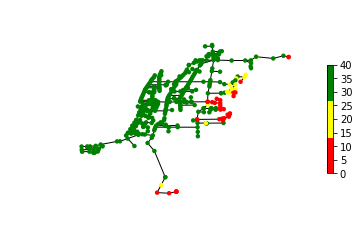

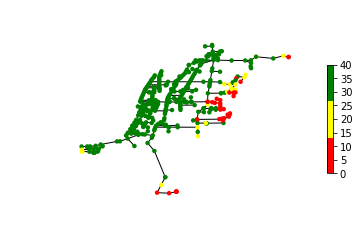

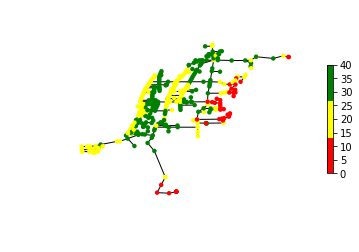

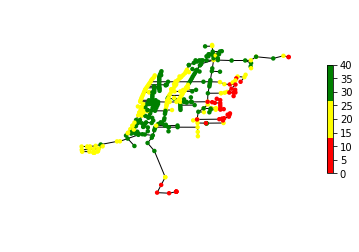

In [51]:
for i in range(0, 24, 6):
    animate(i, results1day, wn1day)

## Time t2: Start Recvoery
### need to have seaside pipeline zoning file. Mock file right now

In [53]:
WN_rec_atr, rec_params = \
wn_recovery.set_recovery_attributes(pipe_PEDS, 
                                    pipe_zone_file='SEASIDE/skeletonized_WN/original_PipeZones_seaside_skeleton.csv',
                                    work_hour_day=16, tzero=4, prod_param = (20, 4), 
                                    crew= [[6, 5, 7, 7, 1, 6],[4, 3, 4, 4, 1, 4],[4, 3, 4, 4, 1, 4]])
results3day, wn3day = wn_recovery.wn_recoveryNday(pipe_PEDS, pump_PEDS,tank_PEDS, WN_rec_atr,rec_params, n_days=3,
                                                  demand=demand1,save_model=True, seed=2)

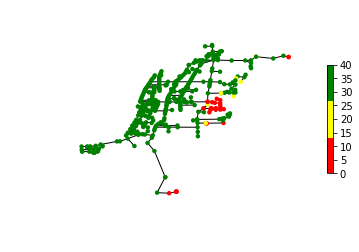

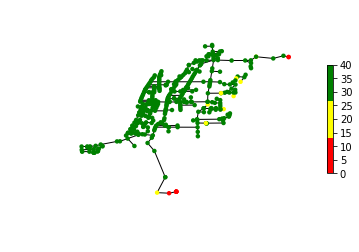

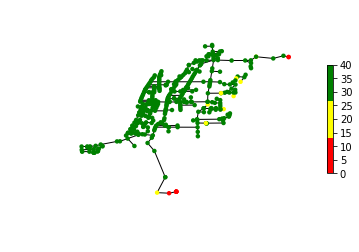

In [54]:
for i in range(17, 72, 24):
    animate(i, results3day, wn3day)

## Time t3: After Recovery, additional dislocation happens and water demand change

In [57]:
waternode_population2 = WaterNetworkRecoveryUtil.additional_waternode_population_dislocation(timestep=7*3600, 
                                                                       wntr_sim_resultsNday=results3day,
                                                                       prev_waternode_population=waternode_population1)
waternode_population2

{'136': 1.0,
 '119': 0.0,
 '105': 0.0,
 '104': 0.0,
 '103': 0.0,
 '102': 1.0,
 '101': 4.0,
 '91': 0.0,
 '88': 0.0,
 '77': 0.0,
 '72': 2.0,
 '66': 0.0,
 '28': 0.0,
 '21': 6.0,
 '20': 0.0,
 '19': 5.0,
 '152': 0.0,
 '153': 0.0,
 '154': 1.0,
 '193': 0.0,
 '198': 0.0,
 '199': 0.0,
 '203': 0.0,
 '155': 0.0,
 '204': 0.0,
 '207': 0.0,
 '208': 2.0,
 '219': 0.0,
 '220': 0.0,
 '221': 0.0,
 '226': 3.0,
 '227': 2.0,
 '254': 0.0,
 '255': 0.0,
 '268': 0.0,
 '272': 0.0,
 '353': 0.0,
 '354': 0.0,
 '355': 0.0,
 '366': 0.0,
 '369': 0.0,
 '380': 0.0,
 '393': 0.0,
 '396': 0.0,
 '399': 0.0,
 '414': 0.0,
 '423': 0.0}

In [58]:
demand2 = WaterNetworkRecoveryUtil.calc_waternode_demand('waternode_building_relations.csv', waternode_population2)
demand2

{'136': 4.8631986e-06,
 '119': 0.0,
 '105': 0.0,
 '104': 0.0,
 '103': 0.0,
 '102': 0.002862878831147619,
 '101': 0.0,
 '91': 0.0,
 '88': 0.0,
 '77': 0.0,
 '72': 9.7263972e-06,
 '66': 0.0,
 '28': 0.0,
 '21': 2.9179191600000002e-05,
 '20': 0.0,
 '19': 2.4315993e-05,
 '152': 0.00014369752482906265,
 '153': 0.0002176497027127195,
 '154': 4.8631986e-06,
 '193': 0.0010583368874218855,
 '198': 0.0,
 '199': 0.0,
 '203': 0.0004506099645030565,
 '155': 0.0,
 '204': 0.0002820272158114529,
 '207': 0.0010238753513035674,
 '208': 9.7263972e-06,
 '219': 0.0,
 '220': 0.0,
 '221': 0.0,
 '226': 1.4589595800000001e-05,
 '227': 9.7263972e-06,
 '254': 0.0,
 '255': 0.0,
 '268': 0.0,
 '272': 0.0005071158113266964,
 '353': 0.0,
 '354': 0.0,
 '355': 0.0,
 '366': 0.0,
 '369': 0.0007924378007436732,
 '380': 0.002792320203378741,
 '393': 0.0,
 '396': 0.0,
 '399': 0.0033230351747138686,
 '414': 0.0,
 '423': 0.0}

In [60]:
results5day, wn5day = wn_recovery.wn_rec_intrp_Nday(n_days=5, intrp_day=3,demand=demand2)

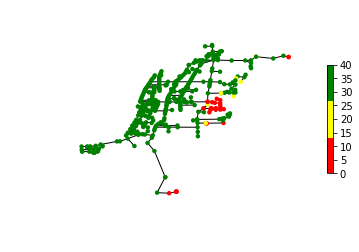

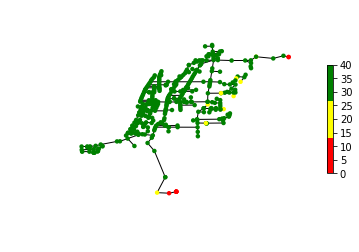

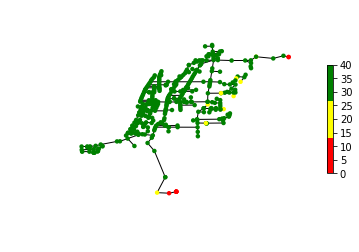

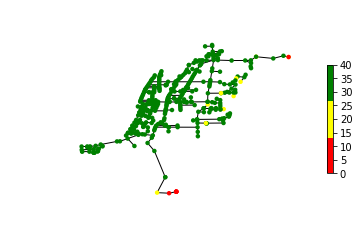

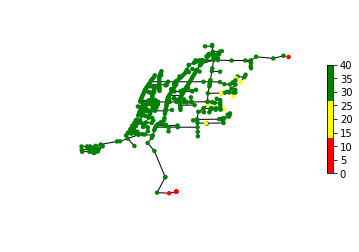

In [61]:
for i in range(17, 5*24, 24):
    animate(i, results5day, wn5day)

In [63]:
results1day.node['pressure']

,1,2,3,4,5,6,8,9,10,11,...,415,416,418,419,421,423,175_leak_node,501,502,67
0,40.126824,36.825689,38.685674,38.415435,37.432330,40.013142,38.688665,38.271900,39.759911,40.007337,...,36.141814,85.528257,17.743296,68.231966,36.245240,0.0,16.315973,3.962400,4.572000,0.0
3600,39.319900,36.102819,37.967197,37.692134,36.709083,39.179784,38.037775,37.609834,39.089996,39.337195,...,35.542025,81.057109,17.075598,67.559929,35.544657,0.0,15.719120,6.275927,-0.727303,0.0
7200,39.277529,36.059162,37.923463,37.648477,36.665426,39.137830,37.992908,37.565166,39.045472,39.292672,...,35.496244,81.075082,17.031024,67.515438,35.500623,0.0,15.673286,5.995002,-0.696319,0.0
10800,39.323382,36.105280,37.969597,37.694595,36.711544,39.183597,38.039275,37.611492,39.091769,39.338968,...,35.542799,81.108515,17.077330,67.561727,35.546818,0.0,15.719852,6.213765,-0.665564,0.0
14400,39.281058,36.061674,37.925914,37.650989,36.667938,39.141689,37.994459,37.566876,39.047297,39.294496,...,35.497070,81.126339,17.032808,67.517287,35.502835,0.0,15.674070,5.932973,-0.634762,0.0
18000,38.674762,35.447659,37.312659,37.037405,36.054300,38.536993,37.394054,36.962477,38.439757,38.687175,...,34.920941,81.042790,16.423933,66.908571,34.893530,0.0,15.099873,6.299148,-0.604189,0.0
21600,37.415260,34.178037,36.043501,35.768147,34.785005,37.283898,36.135362,35.699015,37.172631,37.420166,...,33.722000,80.838511,15.160608,65.643127,33.627265,0.0,13.904723,6.016864,-0.575692,0.0
25200,34.709728,31.422697,33.294167,33.019769,32.035764,34.592332,33.434499,32.976397,34.430923,34.681250,...,31.190089,80.343606,12.424672,62.902772,30.888117,0.0,11.383761,6.170245,-0.551896,0.0
28800,32.427754,29.125269,31.002758,30.728028,29.743316,32.314298,31.194268,30.716261,32.153258,32.405926,...,29.122902,78.314938,10.153065,60.626495,28.607147,0.0,9.327916,5.880491,-0.544430,0.0
32400,30.783011,27.490344,29.372552,29.095786,28.110743,30.668322,29.627911,29.130216,30.551256,30.805029,...,27.727485,76.668863,8.561048,59.026285,26.992582,0.0,7.942721,6.338740,-0.544430,0.0
